# 1. Import Essential Python Libs

In [101]:
#Import necessary python libraries
import numpy as np #algebric computations
import pandas as pd #data processing/handling
import matplotlib.pyplot as plt # data visualization
%matplotlib inline 
import seaborn as sns #for visualization
import warnings #need to suppress warnings
warnings.filterwarnings("ignore")

# 2. Data Reading

In [102]:
loan_df = pd.read_csv('./loan/loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [103]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Observation
1. There are 39,717 rows and 111 column

# 3. Date Cleaning: Remove Redundant or non-relevant column

## 3.1 Remove Columns where all entries are NULL

In [104]:
loan_df1 = loan_df.dropna(axis='columns',how='all')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 3.2 Missing Value Treatment

In [105]:
loan_df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Observation: 
It seems almost all entries are missing for following columns: mths_since_last_delinq, mths_since_last_record, next_pymnt_d
#### Decision
let's drop these columns

In [106]:

loan_df1 = loan_df1.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'])
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## 3.3 Understand each data points, fix data types and decide relevance based on context

#### Observation
* Based on data_dictionary.xls, id & member_id seems unique identifier for book keeping

#### Assumption
Following columns may be relevant only after grant of application based on data_dictionary given
* funded_amnt, funded_amnt_inv, delinq_2yrs, out_prncp*, total_pymnt*, total_rec*, recoveries, collection_recovery_fee, last_pymnt*, last_credit_pull_d,collections_12_mths_ex_med,  

#### Decision
Let's drop those

In [107]:
loan_df2 = loan_df1.drop(columns=['id','member_id','delinq_2yrs','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                                 'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                                 'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med',
                                 'funded_amnt','funded_amnt_inv'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   term                      39717 non-null  object 
 2   int_rate                  39717 non-null  object 
 3   installment               39717 non-null  float64
 4   grade                     39717 non-null  object 
 5   sub_grade                 39717 non-null  object 
 6   emp_title                 37258 non-null  object 
 7   emp_length                38642 non-null  object 
 8   home_ownership            39717 non-null  object 
 9   annual_inc                39717 non-null  float64
 10  verification_status       39717 non-null  object 
 11  issue_d                   39717 non-null  object 
 12  loan_status               39717 non-null  object 
 13  pymnt_plan                39717 non-null  object 
 14  url   

In [108]:
loan_df2['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

#### Observation
Column 'term' seems like ordered categorical type
#### Decision
Let's convert data type as 'category'

In [109]:
loan_df2['term'] = loan_df2['term'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  object  
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  object  
 5   sub_grade                 39717 non-null  object  
 6   emp_title                 37258 non-null  object  
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [110]:
loan_df2['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

#### Observation
* % character is changing type of values
#### Descision
* Need to drop '%' char in order to make use of this column as continuous variable for analysis purpose

In [111]:
#drop last char i.e. % from each value
loan_df2['int_rate'] = loan_df2['int_rate'].apply(lambda x: 0 if (x=='0%') else float(x[:-1])) 
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  object  
 5   sub_grade                 39717 non-null  object  
 6   emp_title                 37258 non-null  object  
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [112]:
loan_df2['grade']

0        B
1        C
2        C
3        C
4        B
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 39717, dtype: object

#### Observation
* Data values seems like ordered categorical variable
#### Assumption/Desision
* it shall be useful to change data type as 'category'

In [113]:
loan_df2['grade'] = loan_df2['grade'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  object  
 6   emp_title                 37258 non-null  object  
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [114]:
loan_df2['sub_grade']

0        B2
1        C4
2        C5
3        C1
4        B5
         ..
39712    A4
39713    C1
39714    A4
39715    A2
39716    E2
Name: sub_grade, Length: 39717, dtype: object

#### Observation
* Data values seems like ordered categorical variable
#### Assumption/Desision
* it shall be useful to change data type as 'category'

In [115]:
loan_df2['sub_grade'] = loan_df2['sub_grade'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  object  
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [116]:
loan_df2['emp_title'].value_counts()

US Army                                   134
Bank of America                           109
IBM                                        66
AT&T                                       59
Kaiser Permanente                          56
                                         ... 
DOE/Vocational Rehabilitation Services      1
EAM Partners  L.P.                          1
Timothy Academy                             1
Southwest Rural metro                       1
OATI                                        1
Name: emp_title, Length: 28820, dtype: int64

#### Observation
* Values seems like a category
#### Decision
* let's change the type as 'category' for future analysis needs

In [117]:
loan_df2['emp_title'] = loan_df2['emp_title'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  object  
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [118]:
loan_df2['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

#### Observation
* Values seem like ordered categorical type
#### Decision
* Change data type as 'category'

In [119]:
loan_df2['emp_length'] = loan_df2['emp_length'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  object  
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [120]:
loan_df2['home_ownership']

0            RENT
1            RENT
2            RENT
3            RENT
4            RENT
           ...   
39712    MORTGAGE
39713        RENT
39714    MORTGAGE
39715    MORTGAGE
39716         OWN
Name: home_ownership, Length: 39717, dtype: object

#### Observation
* Values seem like categorical
#### Decision
* Let's change the data type as 'category'

In [121]:
loan_df2['home_ownership'] = loan_df2['home_ownership'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  object  
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

In [122]:
loan_df2['verification_status']

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
4        Source Verified
              ...       
39712       Not Verified
39713       Not Verified
39714       Not Verified
39715       Not Verified
39716       Not Verified
Name: verification_status, Length: 39717, dtype: object

#### Observation
* Data seems like categorical in nature
#### Decision
* Let's change the type as 'category'

In [123]:
loan_df2['verification_status'] = loan_df2['verification_status'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  object  
 13  pymnt_plan                39717 non-null  obje

#### Assumption: 
* column 'issue_d' is related to start of loan; it may not be relevant
#### Decision
* let's leave it asis for now

In [124]:
loan_df2['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

#### Observation
* Values seems like category

#### Decision
* let's convert as 'category'

In [125]:
loan_df2['loan_status'] = loan_df2['loan_status'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  pymnt_plan                39717 non-null  obje

In [126]:
loan_df2['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

#### Observation
* all values are same

#### Decision
Let's drop this column

In [127]:
loan_df2 = loan_df2.drop(columns=['pymnt_plan'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  url                       39717 non-null  obje

In [128]:
loan_df2['url'].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=771628     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1066835    1
https://lendingclub.com/browse/loanDetail.action?loan_id=1043274    1
https://lendingclub.com/browse/loanDetail.action?loan_id=779618     1
https://lendingclub.com/browse/loanDetail.action?loan_id=570266     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=715333     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1033669    1
https://lendingclub.com/browse/loanDetail.action?loan_id=478103     1
https://lendingclub.com/browse/loanDetail.action?loan_id=601964     1
https://lendingclub.com/browse/loanDetail.action?loan_id=827374     1
Name: url, Length: 39717, dtype: int64

#### Observation
* Seems like being used for tracking the loan application

#### Assumption
* Not useful for analyzing the application

#### Decision
* Let's drop this column

In [129]:
loan_df2 = loan_df2.drop(columns=['url'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  desc                      26777 non-null  obje

In [130]:
loan_df2['desc'].value_counts()

#### Observation
* Details are description about loan

#### Assumption
* These details are elaboraton beyond purpose of loan; it may be out of scope for EDA

#### Decision
* let's drop this column

In [131]:
loan_df2 = loan_df2.drop(columns=['desc'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  obje

In [132]:
loan_df2['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

#### Observation
* Seems like category

#### Decision
* Let's change the type as 'category'

In [133]:
loan_df2['purpose'] = loan_df2['purpose'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

In [134]:
loan_df2['title'].value_counts()

Debt Consolidation           2184
Debt Consolidation Loan      1729
Personal Loan                 659
Consolidation                 517
debt consolidation            505
                             ... 
Fresh Start with a Spin         1
îîMY FIRST CAR îî       1
Mperreault                      1
Shop/Toy Garage                 1
Gap Card Loan                   1
Name: title, Length: 19615, dtype: int64

#### Observation
* Seems like alternate or similar to 'purpose' column

#### Decision
* Let's drop the column

In [135]:
loan_df2 = loan_df2.drop(columns=['title'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

In [136]:
loan_df2[['zip_code','addr_state']]

,zip_code,addr_state
0,860xx,AZ
1,309xx,GA
2,606xx,IL
3,917xx,CA
4,972xx,OR
...,...,...
39712,802xx,CO
39713,274xx,NC
39714,017xx,MA
39715,208xx,MD


#### Observation
* Column 'zip_code' seems like being kept as confidential
* column 'addr_state' is more of categorical in nature

#### Decision 
* Let's drop 'zip_code'
* convert column 'addr_state' as categorical

In [137]:
loan_df2 = loan_df2.drop(columns=['zip_code'])
loan_df2['addr_state'] = loan_df2['addr_state'].astype('category')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

In [138]:
loan_df2['earliest_cr_line'].value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Dec-61      1
Feb-67      1
Oct-64      1
Apr-66      1
Nov-61      1
Name: earliest_cr_line, Length: 526, dtype: int64

#### Observation/Assumption
* Significance of this column need to be explored further

#### Decision
* let's skip for now

In [139]:
loan_df2['inq_last_6mths'].value_counts()
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

#### Observation
* columns 'revol_bal' and 'revol_util' seems like opposite of each other based on Data_Dictionary.xls

#### Assumption
* dropping of one of these may not have an impact

#### Decision
* let's drop 'revol_util' column

In [140]:
loan_df2 = loan_df2.drop(columns=['revol_util'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

In [142]:
loan_df2['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

#### Observation
* same value for all rows; it may not be useful

#### Decision
* let's drop this column

In [143]:
loan_df2 = loan_df2.drop(columns='initial_list_status')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

In [145]:
loan_df2['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

#### Observation
* all rows has same value viz. 1

#### Decision
* Let's drop this column

In [146]:
loan_df2 = loan_df2.drop(columns='policy_code')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

In [148]:
loan_df2['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

#### Observation
* All values are same viz. INDIVIDUAL

#### Decision
* let's drop this column

In [149]:
loan_df2 = loan_df2.drop(columns='application_type')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

In [151]:
loan_df2['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

#### Observation
* All rows has same value viz. 0

#### Decision
* Let's drop this column

In [152]:
loan_df2 = loan_df2.drop(columns='acc_now_delinq')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

#### Observation
* Based on Data Dictions, column 'chargeoff_within_12_mths' may be relevant for post loan gran

#### Decision
* let's drop this column

In [153]:
loan_df2 = loan_df2.drop(columns='chargeoff_within_12_mths')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             39717 non-null  int64   
 1   term                  39717 non-null  category
 2   int_rate              39717 non-null  float64 
 3   installment           39717 non-null  float64 
 4   grade                 39717 non-null  category
 5   sub_grade             39717 non-null  category
 6   emp_title             37258 non-null  category
 7   emp_length            38642 non-null  category
 8   home_ownership        39717 non-null  category
 9   annual_inc            39717 non-null  float64 
 10  verification_status   39717 non-null  category
 11  issue_d               39717 non-null  object  
 12  loan_status           39717 non-null  category
 13  purpose               39717 non-null  category
 14  addr_state            39717 non-null  category
 15  dt

In [154]:
loan_df2['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

#### Observation
* All rows has value of 0; it may not be useful for analysis

#### Decision
* Let's drop this column

In [155]:
loan_df2 = loan_df2.drop(columns='delinq_amnt')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             39717 non-null  int64   
 1   term                  39717 non-null  category
 2   int_rate              39717 non-null  float64 
 3   installment           39717 non-null  float64 
 4   grade                 39717 non-null  category
 5   sub_grade             39717 non-null  category
 6   emp_title             37258 non-null  category
 7   emp_length            38642 non-null  category
 8   home_ownership        39717 non-null  category
 9   annual_inc            39717 non-null  float64 
 10  verification_status   39717 non-null  category
 11  issue_d               39717 non-null  object  
 12  loan_status           39717 non-null  category
 13  purpose               39717 non-null  category
 14  addr_state            39717 non-null  category
 15  dt

In [157]:
loan_df2['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [159]:
loan_df2['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

#### Observation
* All entries are zero or NAN

#### Decision
* Let's drop the column

In [160]:
loan_df2 = loan_df2.drop(columns='tax_liens')
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             39717 non-null  int64   
 1   term                  39717 non-null  category
 2   int_rate              39717 non-null  float64 
 3   installment           39717 non-null  float64 
 4   grade                 39717 non-null  category
 5   sub_grade             39717 non-null  category
 6   emp_title             37258 non-null  category
 7   emp_length            38642 non-null  category
 8   home_ownership        39717 non-null  category
 9   annual_inc            39717 non-null  float64 
 10  verification_status   39717 non-null  category
 11  issue_d               39717 non-null  object  
 12  loan_status           39717 non-null  category
 13  purpose               39717 non-null  category
 14  addr_state            39717 non-null  category
 15  dt

<AxesSubplot:>

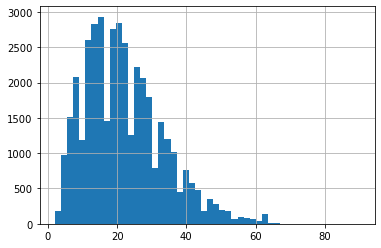

In [95]:
loan_df2['total_acc'].hist(bins=50)

In [84]:
loan_df2['pub_rec'].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [85]:
loan_df2['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [86]:
#since all entries has same value; we can drop column 'initial_list_status'
loan_df2 = loan_df2.drop(columns=['initial_list_status'])
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   term                      39717 non-null  category
 2   int_rate                  39717 non-null  float64 
 3   installment               39717 non-null  float64 
 4   grade                     39717 non-null  category
 5   sub_grade                 39717 non-null  category
 6   emp_title                 37258 non-null  category
 7   emp_length                38642 non-null  category
 8   home_ownership            39717 non-null  category
 9   annual_inc                39717 non-null  float64 
 10  verification_status       39717 non-null  category
 11  issue_d                   39717 non-null  object  
 12  loan_status               39717 non-null  category
 13  purpose                   39717 non-null  cate

In [87]:
# Following columns 'out_prncp' and 'out_prncp_inv' seem related to curren in-progress loan based on Data-Dictionory.xls
# let's drop them since these params may not be available at time of application
loan_df2 = loan_df2.drop(columns=['out_prncp','out_prncp_inv'])
loan_df2.info()

KeyError: "['out_prncp' 'out_prncp_inv'] not found in axis"

In [ ]:
# Following columns 'total_pymnt' and 'total_pymnt_inv' seem related to curren in-progress loan based on Data-Dictionory.xls
# let's drop them since these params may not be available at time of application
loan_df2 = loan_df2.drop(columns=['total_pymnt','total_pymnt_inv'])
loan_df2.info()

In [ ]:
#column 'total_rec_prncp' is related to loan in progress as per Data-Dictionary.xls
# let's drop it
loan_df2 = loan_df2.drop(columns=['total_rec_prncp'])
loan_df2.info()

In [ ]:
# column "total_rec_int" is about interest received on in progress loan; 
# let's drop it 
loan_df2 = loan_df2.drop(columns=['total_rec_int'])
loan_df2.info()

In [ ]:
# column 'total_rec_late_fee' is about late fee received on in progress loan
# let's drop it 
loan_df2 = loan_df2.drop(columns=['total_rec_late_fee'])
loan_df2.info()

In [ ]:
# column "recoveries" is related to amount received post declaring charged off
# we can drop it since it is not related to application timing
loan_df2 = loan_df2.drop(columns=['recoveries'])
loan_df2.info()

In [ ]:
# column 'collection_recovery_fee' it also related to post charge off situation as per Data Dictionay.xls
# assumption: not related at the time of application
loan_df2 = loan_df2.drop(columns=['collection_recovery_fee'])
loan_df2.info()

In [ ]:
# columns 'last_pymnt_d' 'last_pymnt_amnt' and 'last_credit_pull_d' are related to loan in progress
# assumption: we can drop those since may not be relevant at time of application
loan_df2 = loan_df2.drop(columns=['last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'])
loan_df2.info()

In [ ]:
# columns 'collections_12_mths_ex_med' seems to be relevant to in progress borrowing
# assumption: we can drop it
loan_df2 = loan_df2.drop(columns=['collections_12_mths_ex_med'])
loan_df2.info()

In [ ]:
loan_df2['policy_code'].value_counts()

In [ ]:
# seems like standard value for all entries; we can drop it
loan_df2 = loan_df2.drop(columns=['policy_code'])
loan_df2.info()

In [ ]:
loan_df2['application_type'].value_counts()

In [ ]:
# same values for all entries; we can drop this column
loan_df2 = loan_df2.drop(columns=['application_type'])
loan_df2.info()

In [ ]:
loan_df2['acc_now_delinq'].value_counts()

In [ ]:
# let's drop column 'acc_now_delinq' since all entries are same
loan_df2 = loan_df2.drop(columns=['acc_now_delinq'])
loan_df2.info()

In [ ]:
loan_df2['chargeoff_within_12_mths'].value_counts()

In [ ]:
# column 'chargeoff_within_12_mths' can be dropped since it does not have any useful value
loan_df2 = loan_df2.drop(columns=['chargeoff_within_12_mths'])
loan_df2.info()

In [ ]:
loan_df2['pub_rec_bankruptcies'].value_counts()

## 3.4 Let's check and correct the datatype, if required

In [ ]:
loan_df2.info()

## 3.x Let's Perform Sanity check on Data

* Is range of interest rate correct?

In [ ]:
loan_df2['int_rate'].describe()

## 3.3 Visualize distribution of loan status

In [ ]:
loan_df2['loan_status'].value_counts().plot.barh()

## 3.xx Univariate Analysis

In [ ]:
loan_df2['term'].value_counts().plot.bar()

In [ ]:
#let's make this column as categorical variable to make use during analysis
loan_df2['term'] = loan_df2['term'].astype('category')

In [ ]:
loan_df2['loan_amnt'].describe()

In [ ]:
loan_df2['installment'].describe()

In [ ]:
#'loan_amnt' seems to have high variance inside data
# possible apporach may be to create a derived column with ordered categorical variable: 
#Very_Low_Amnt_Loan, Low_Amnt_Loan, Mid_Amnt_Loan, High_Amnt_Loan and Very_High_Amnt_Loan
loan_df2['Loan_Amnt__Bucket']=pd.qcut(loan_df2['loan_amnt'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Amnt_Loan','Low_Amnt_Loan','Mid_Amnt_Loan','High_Amnt_Loan',
                                             'Very_High_Amnt_Loan'])

In [ ]:
loan_df2['emp_length'].value_counts().plot.bar()

In [ ]:
#let's convert 'emp_length' as categorical variable
loan_df2['emp_length'] = loan_df2['emp_length'].astype('category')

In [ ]:
loan_df2['grade'].value_counts().plot.bar()

In [ ]:
loan_df2['home_ownership'].value_counts().plot.bar()

In [ ]:
#let's convert 'home_ownership' as categorical for using during analyis
loan_df2['home_ownership'] = loan_df2['home_ownership'].astype('category')

In [ ]:
loan_df2['annual_inc'].describe()

In [ ]:
loan_df2['annual_inc'].plot.box()

In [ ]:
#'annual_inc' seems to have high variance inside data
# possible apporach may be to create a derived column with ordered categorical variable: 
#Very_Low_Income, Low_Income, Mid_Income, High_Income and Very_High_Income
loan_df2['Income_Bucket']=pd.qcut(loan_df2['annual_inc'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Income','Low_Income','Mid_Income','High_Income',
                                             'Very_High_Income'])

In [ ]:
loan_df2['verification_status'].value_counts().plot.bar()

In [ ]:
#let's convert this 'verification_status' as category for leveraging it for analysis
loan_df2['verification_status'] = loan_df2['verification_status'].astype('category')

In [ ]:
loan_df2['dti'].describe()

In [ ]:
loan_df2['purpose'].value_counts().plot.bar()

In [ ]:
#let's convert 'purpose' as categorical variable 
loan_df2['purpose'] = loan_df2['purpose'].astype('category')

In [ ]:
loan_df2['open_acc'].describe()

In [ ]:
loan_df2['pub_rec'].describe()

In [ ]:
#need to drop this column since it has no useful information
loan_df2 = loan_df2.drop(columns='pub_rec')

In [ ]:
loan_df2['inq_last_6mths'].describe()

In [ ]:
loan_df2['revol_bal'].describe()

In [ ]:
#'revold_bal' seems to have high variance inside data
# possible apporach may be to create a derived column with ordered categorical variable: 
#Very_Low_Revol_Bal, Low_Revol_Bal, Mid_Revol_Bal, High_Revol_Bal and Very_High_Revol_Bal
loan_df2['Revol_Bal_Bucket']=pd.qcut(loan_df2['revol_bal'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Revol_Bal','Low_Revol_Bal','Mid_Revol_Bal','High_Revol_Bal',
                                             'Very_High_Revol_Bal'])

In [ ]:
loan_df2['total_acc'].describe()

In [ ]:
loan_df2['total_acc'].plot.box()

## 3.xx Bivariate Analysis

In [ ]:
loan_df2.info()

In [ ]:
#for further analyis we can ignore loan with Current status as we do not know outcome of those in future yet
loan_df2 = loan_df2[~(loan_df2['loan_status'] == 'Current')]

In [ ]:
loan_df2['loan_status']

In [ ]:
#for further analyis let's create segments
loan_df_charge_off = loan_df2[(loan_df2['loan_status'] == 'Charged Off')]
loan_df_fully_paid = loan_df2[(loan_df2['loan_status'] == 'Fully Paid')]

### Charge Off  (defaulters) loan Analysis

In [ ]:
loan_df_charge_off.size

In [ ]:
loan_df2.groupby(by='loan_status')['loan_amnt'].median().plot.bar()

In [ ]:
loan_df2.groupby(by='loan_status')['loan_amnt'].mean().plot.bar()

In [ ]:
#what is the relationship between loan status vs loan terms
loan_df2.groupby(by='loan_status')['term'].value_counts().plot.bar()

In [ ]:
#what is the relationship between loan_amnt vs loan term
loan_df2.groupby(by='term')['loan_amnt'].mean().plot.bar()

In [ ]:
loan_df2.groupby(by='term')['loan_amnt'].median().plot.bar()

In [ ]:
#what is the relationship between loan_status vs interest rate
loan_df2.groupby(by='loan_status')['int_rate'].mean().plot.bar()

In [ ]:
#what is the relationship annual income vs interest rate
sns.pairplot(data=loan_df2[['annual_inc','int_rate']])

In [ ]:
# what is the relationship between income, loan_status and term of loan
income_vs_term_vs_loan_status = pd.pivot_table(data=loan_df2, index='Income_Bucket', columns='loan_status', values='term',aggfunc='count')
income_vs_term_vs_loan_status.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
loan_df2.groupby(by='loan_status')['int_rate'].median().plot.bar()

In [ ]:
loan_df2.groupby(by='Income_Bucket')['int_rate'].median().plot.bar()

In [ ]:
#what is the relationship among loan_status, annual income vs interest rate
loan_status_vs_income_vs_interest_rate = pd.pivot_table(data=loan_df2, index='Income_Bucket', columns='loan_status', values='int_rate')
loan_status_vs_income_vs_interest_rate.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the relationship among loan amount, interest rate and loan_status
loan_amount_vs_int_rate_vs_loan_status = pd.pivot_table(data=loan_df2, index='Loan_Amnt__Bucket', columns='loan_status', values='int_rate', aggfunc=np.mean)
loan_amount_vs_int_rate_vs_loan_status.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the relationship among annual income, loan amount vs loan_status
income_vs_loan_amount = pd.pivot_table(data=loan_df2, index='Income_Bucket', columns='loan_status', values='loan_amnt', aggfunc=np.median)
income_vs_loan_amount.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the relationship among annual income, loan purpose vs loan_status
income_vs_loan_purpose = pd.pivot_table(data=loan_df2, index='Income_Bucket', columns='purpose', values='member_id', aggfunc='count')
income_vs_loan_purpose.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the relationship among annual income, loan purpose vs loan_status
income_vs_loan_purpose = pd.pivot_table(data=loan_df2, index='Income_Bucket', columns='purpose', values='loan_amnt', aggfunc=sum)
income_vs_loan_purpose.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the relantionship between income vs debt

In [ ]:
#what is the relationship among loan_amnt, loan purpose vs loan_status
income_vs_loan_purpose = pd.pivot_table(data=loan_df2, index='loan_status', columns='purpose', values='loan_amnt')
income_vs_loan_purpose.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the relationship between the location and loan status
loan_status_vs_state = pd.pivot_table(data=loan_df2, index='addr_state', columns='loan_status', values='member_id', aggfunc='count')
loan_status_vs_state.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the relationship between the location, income and loan status
state_vs_income_vs_loan_status = pd.pivot_table(data=loan_df2, index='addr_state', columns='loan_status', values='annual_inc', aggfunc=np.median)
state_vs_income_vs_loan_status.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
loan_df_charge_off.groupby(by='purpose')['loan_amnt'].sum().plot.bar()

In [ ]:
loan_df_charge_off.groupby(by='Income_Bucket')['loan_amnt'].sum().plot.bar()

In [ ]:
#let's visualize relationship between loan_status vs purpose
loan_status_vs_purpose = pd.pivot_table(data=loan_df_charge_off, index='Income_Bucket', 
                                              columns='purpose', values='member_id', aggfunc='count')
loan_status_vs_purpose.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

In [ ]:
#what is the relationship between income & length of employment
income_vs_emp_length = pd.pivot_table(data=loan_df_charge_off, index='emp_length', 
                                              columns='Income_Bucket', values='annual_inc', aggfunc=np.median)
income_vs_emp_length.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

In [ ]:
#what is the relationship of grade for charge-off loans
loan_df_charge_off['grade'].value_counts().plot.bar()

In [ ]:
loan_df_charge_off.groupby(['grade'])['sub_grade'].value_counts().plot.bar()
plt.figimage()

In [ ]:
loan_df_charge_off['home_ownership'].value_counts().plot.bar()

In [ ]:
#what is the relationship among loan_amount, loan_status and home ownershipe
loan_amount_vs_loan_status_vs_home_ownershipe = pd.pivot_table(data=loan_df_charge_off, index='Loan_Amnt__Bucket', 
                                              columns='loan_status', values='home_ownership', aggfunc='count')
loan_amount_vs_loan_status_vs_home_ownershipe.plot(kind='bar', stacked=False, figsize=[16,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#what is the CIBIL score

In [ ]:
#what is the history of previous loans

In [ ]:
#what is the relationship for number of dependents or number of member making income

In [ ]:
loan_df_charge_off['verification_status'].value_counts().plot.bar()

In [ ]:
loan_df_charge_off['inq_last_6mths'].value_counts().plot.bar()

In [ ]:
loan_df_charge_off['open_acc'].value_counts().plot.bar()

In [ ]:
#what is the relationship between income & revolving balancce
f = plt.figure()
f.set_figwidth(25)
loan_df_charge_off['total_acc'].value_counts().plot.bar()

plt.show()

In [ ]:
loan_df_charge_off['pub_rec_bankruptcies'].value_counts().plot.bar()

### Fully Paid loan Analysis

In [ ]:
loan_df_fully_paid.groupby(by='purpose')['loan_amnt'].sum().plot.bar()

In [ ]:
loan_df_fully_paid.info()

In [ ]:
loan_df_charge_off.info()

In [ ]:
#let's visualize relationship between loan_status vs purpose
loan_status_vs_purpose = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='purpose', values='loan_amnt', aggfunc=np.median)
loan_status_vs_purpose.plot(kind='bar', stacked=True, figsize=[10,6],colormap='tab20')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [ ]:
#let's visualize relationship between loan_status vs Income_Bucket
loan_status_vs_Income_Bucket = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='Income_Bucket', values='loan_amnt', aggfunc=np.median)

In [ ]:
loan_status_vs_Income_Bucket.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(loc='best')
plt.show()

In [ ]:
sns.heatmap(loan_status_vs_Income_Bucket)

In [ ]:
#let's visualize relationship between purpose of loan vs income of people
Income_Bucket_vs_loan_purpose = pd.pivot_table(data=loan_df2, index='Income_Bucket', 
                                              columns='purpose', values='loan_amnt', aggfunc=np.median)

In [ ]:
Income_Bucket_vs_loan_purpose.plot(kind='bar', stacked=True, figsize=[16,6],colormap='tab20')
plt.legend(loc='best')
plt.show()

In [ ]:
#let's visualize relationship between loan_status vs Revol_Bal_Bucket
loan_status_vs_Revol_Bal_Bucket = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='Revol_Bal_Bucket', values='loan_amnt', aggfunc=np.median)

In [ ]:
sns.heatmap(loan_status_vs_Revol_Bal_Bucket)

In [ ]:
#let's visualize relationship between loan_status vs loan term
loan_status_vs_loan_term = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='term', values='loan_amnt', aggfunc=np.median)
sns.heatmap(loan_status_vs_loan_term)

In [ ]:
#let's visualize relationship between loan_status vs career length
loan_status_vs_emp_length = pd.pivot_table(data=loan_df2, index='loan_status', 
                                              columns='emp_length', values='loan_amnt', aggfunc=np.median)
sns.heatmap(loan_status_vs_emp_length)

In [ ]:
loan_df2.groupby(by=['emp_length'])['dti'].mean().plot.barh()

In [ ]:
#let's understand the purpose of loan based on length of career
emp_length_vs_purpose = pd.pivot_table(data=loan_df2, index='emp_length', values='loan_amnt', columns='purpose')
emp_length_vs_purpose.plot(kind='bar', stacked=True, figsize=[20,6])
plt.legend(loc='best')
plt.show()

### let's analyse relationship of loan_status with each numerical columns

In [ ]:
loan_df2.groupby(by=['loan_status'])['loan_amnt'].mean().plot.barh()

In [ ]:
loan_df2.info()

In [ ]:
# let's analyze relationship loan_status vs inq_last_6mths
loan_status_vs_inq_last_6mths = pd.pivot_table(data=loan_df2, index='loan_status', values='member_id', columns='inq_last_6mths',aggfunc='count')
loan_status_vs_inq_last_6mths.plot(kind='bar', stacked=True, figsize=[20,6])
plt.legend(loc='best')
plt.show()

In [ ]:
# let's analyze relationship loan_status vs grade
loan_status_vs_grade = pd.pivot_table(data=loan_df2, index='loan_status', values='member_id', columns='grade', aggfunc='count')
loan_status_vs_grade.plot(kind='bar', stacked=True, figsize=[20,6])
plt.legend(loc='best')
plt.show()

In [ ]:
# let's analyze relationship loan_status vs home_ownership
loan_df2.groupby(by=['loan_status'])['home_ownership'].count().plot.bar(stacked=True)

### conclusion xx: no relationship of loan status vs loan amount

In [ ]:
loan_df3.groupby(by=['loan_status'])['loan_amnt'].mean().plot.barh()

## 3.4 Analyze relationship of "Charged Off" with customer related params

In [ ]:
loan_df_charged_off = loan_df3[(loan_df3['loan_status']=='Charged Off')]

In [ ]:
loan_df_charged_off.shape

In [ ]:
loan_df_charged_off.info()

In [ ]:
sns.pairplot(loan_df_charged_off[['loan_amnt','int_rate','annual_inc','dti','revol_bal']])

In [ ]:
loan_df_charged_off.info()

In [ ]:
sns.pairplot(loan_df_charged_off[['inq_last_6mths','open_acc','pub_rec','total_acc']])